Programando no Qiskit

In [2]:
from qiskit import*

Estado de Bell

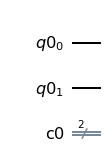

In [3]:
reg_quantico = QuantumRegister(2)
reg_classico = ClassicalRegister(2)
circuit = QuantumCircuit(reg_quantico,reg_classico)

%matplotlib inline
circuit.draw()

Criando o emaramento- 1) passo: Aplicar a porta de Hadamard

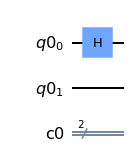

In [4]:
circuit.h(reg_quantico[0])
circuit.draw()

2) Passo: Aplicar uma porta CNOT

In [5]:
circuit.cx(reg_quantico[0],reg_quantico[1])


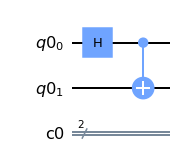

In [6]:
circuit.draw()

3) passo: Mediçao

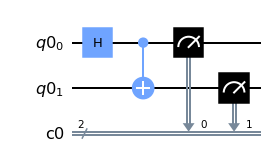

In [7]:
circuit.measure(reg_quantico,reg_classico)
circuit.draw()

1) Alternativa: Simular um circuito qunatico em um computador clássico

In [8]:
simulador = Aer.get_backend('qasm_simulator')
execute(circuit, backend = simulador)

In [12]:
result = execute(circuit, backend = simulador).result()

In [16]:
from  qiskit .tools.visualization import plot_histogram

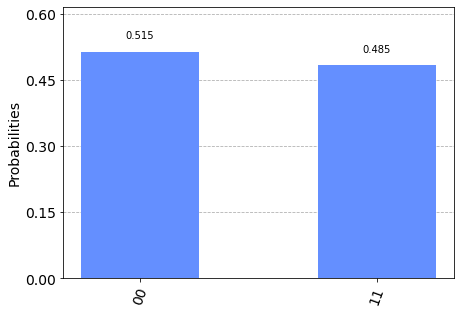

In [15]:
counts = result. get_counts()
plot_histogram(counts)

2) Simular um circuito quantico em uma dispositivo da IBM Q

In [19]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
comp_quantico = provider.get_backend('ibmq_quito')

ibmqfactory.load_account:WARNING:2021-10-26 20:54:24,743: Credentials are already in use. The existing account in the session will be replaced.


In [23]:
job = execute(circuit, backend = comp_quantico)

In [21]:
from qiskit.tools.monitor import job_monitor

In [22]:
job_monitor(job)
result = job.result()

Job Status: job has successfully run


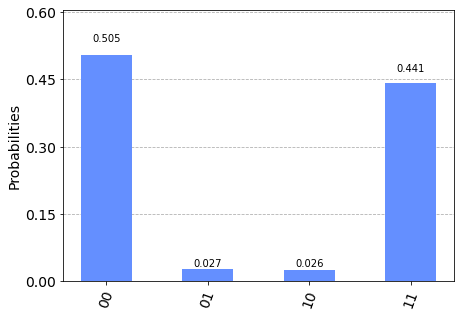

In [25]:
plot_histogram(result.get_counts(circuit))